# California House pricing regression

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [2]:
# Define function to load data
def load_data(filename):
    return pd.read_csv(filename)

In [3]:
housing = load_data('data/housing_cal.csv')

## Look at data generally

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

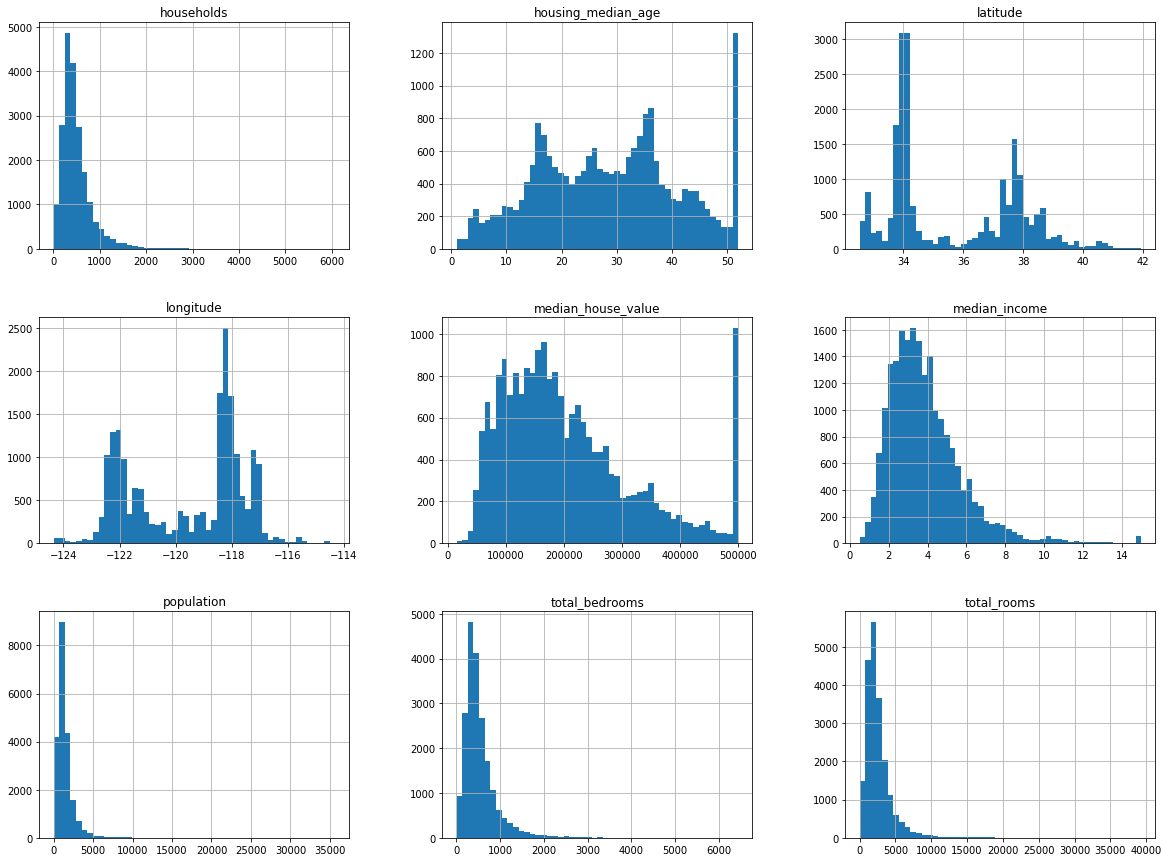

In [7]:
# Histogram: 
# note the capping of house values at 500K, and capping of median age
# We may want to filter data before using in machine learning
housing.hist(bins=50, figsize=(20,15));

## Visualise geographic data

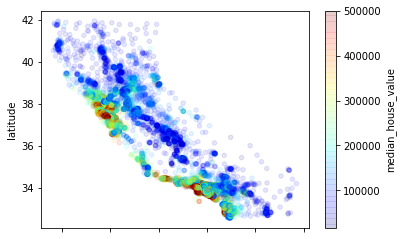

In [8]:
# Convert house price to colour, and income to radious

housing.plot(kind='scatter',
    x = 'longitude',
    y = 'latitude',
    c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
    alpha = 0.1);

## Look for correlarions (covariance)

In [9]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

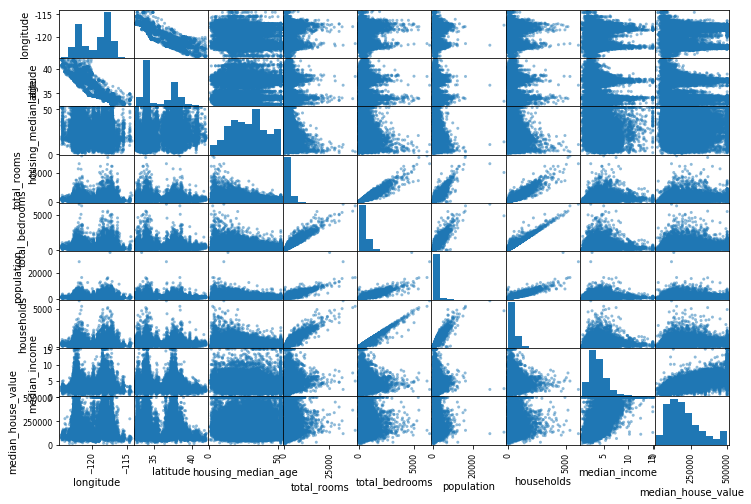

In [10]:
# Show full correlation matrix plot
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(12,8));

In [11]:
# Show highest corrlations with median house price
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Create additional features

We can create some more features from the ones given:

In [12]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

View correlation again.

In [13]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Split into training and test sets 

In [14]:
housing_training = housing.sample(frac=0.8, random_state=0)
housing_test = housing.drop(housing_training.index)

In [15]:
housing_training_value = housing_training.pop('median_house_value')
housing_test = housing_test.pop('median_house_value')

## Data cleaning

We will first impute missing values with medians. We will look through columns fof missing values (NaN) and if thre are missing values, impute them with the median.

In [30]:
def impute_with_median (df):
    cols = list(df)
    for column in cols:
        col_data = df[column]
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            col_median = col_data.median()
            col_data.fillna(col_median, inplace=True)
            df[column] = col_data
    return df   

hosuing = impute_with_median(housing)

triggered
triggered


In [31]:
cols = list(housing)
for column in cols:
    col_data = housing[column]
    print (sum(col_data.isna()))

0
0
0
0
0
0
0
0
0
0
0
0
0
